In [1]:
%matplotlib notebook

In [2]:
! pip install PyGithub

In [3]:
# Import dependencies
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import datetime

# Import GitHub 'personal access key' to be able to pull source coronavirus data from John Hopkins' public GitHub repo
from config import git_key

In [5]:
# Create defined function to pull an individual data set from GitHub
def corona_df(git_key, branch):
    from github import Github
    import requests
    import io
    # First create a Github instance  using username and password
    # g = Github("user", "password")
    # # or using an access token
    g = Github(git_key)
    
    # Specific GitHub repository name/URL for 'get_repo' request:
    repo = g.get_repo("CSSEGISandData/COVID-19")
    
    # URL for GET requests to retrieve coronavirus data:
    contents = repo.get_contents(branch)
    
    # Reading source data (.csv files) from GitHub branch and decode, returning a Pandas dataframe:
    df = pd.read_csv(io.StringIO(contents.decoded_content.decode('utf-8')))
    return df

In [6]:
# Pull "APIs" using defined formula above
confirmed_df = corona_df(git_key,"/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")
deaths_df = corona_df(git_key,"/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv")
recovered_df = corona_df(git_key,"/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv")

In [7]:
# View Confirmed cases data
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20
0,Anhui,Mainland China,31.82571,117.2264,1,9,15,39,60,70,...,665,733,779,830,860,889,910,934,950,962
1,Beijing,Mainland China,40.18238,116.4142,14,22,36,41,68,80,...,297,315,326,337,342,352,366,372,375,380
2,Chongqing,Mainland China,30.05718,107.8740,6,9,27,57,75,110,...,426,428,468,486,505,518,529,537,544,551
3,Fujian,Mainland China,26.07783,117.9895,1,5,10,18,35,59,...,224,239,250,261,267,272,279,281,285,287
4,Gansu,Mainland China,36.06110,103.8343,0,2,2,4,7,14,...,67,79,83,83,86,87,90,90,90,90


In [8]:
# View Deaths data
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20
0,Anhui,Mainland China,31.82571,117.2264,0,0,0,0,0,0,...,0,0,1,3,4,4,5,6,6,6
1,Beijing,Mainland China,40.18238,116.4142,0,0,0,0,0,1,...,1,2,2,2,3,3,3,3,4,4
2,Chongqing,Mainland China,30.05718,107.8740,0,0,0,0,0,0,...,2,2,2,2,3,3,4,5,5,5
3,Fujian,Mainland China,26.07783,117.9895,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Gansu,Mainland China,36.06110,103.8343,0,0,0,0,0,0,...,0,1,2,2,2,2,2,2,2,2


In [9]:
# View Recovered cases data
recovered_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/07/20,2/08/20,2/09/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20
0,Anhui,Mainland China,31.82571,117.2264,0.0,0.0,0.0,0.0,0.0,0.0,...,47.0,59.0,72.0,88.0,105.0,127.0,157.0,193,221,255
1,Beijing,Mainland China,40.18238,116.4142,0.0,0.0,1.0,2.0,2.0,2.0,...,33.0,34.0,37.0,44.0,48.0,56.0,69.0,80,98,108
2,Chongqing,Mainland China,30.05718,107.8740,0.0,0.0,0.0,0.0,0.0,0.0,...,31.0,39.0,51.0,66.0,79.0,102.0,128.0,152,184,207
3,Fujian,Mainland China,26.07783,117.9895,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,24.0,35.0,39.0,45.0,53.0,57.0,63,71,82
4,Gansu,Mainland China,36.06110,103.8343,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,12.0,16.0,17.0,24.0,31.0,39.0,39,49,54


In [10]:
#Define function for cleaning the data
def clean_df(df):
    
    df = df.fillna(value=0)                                          # Fill NaN with zero values
    df = df.drop(columns=[ "Lat", "Long"])                           # Drop "Lat" "Long" for raw number data
    df = df.groupby(['Country/Region'], as_index=False).agg('sum')   # Create groupby object for sorting by country/region and aggregate
    df = df.set_index(["Country/Region"])                            # Define new index
    df = df.astype(int)                                              # Set all values as integers
    df = df.sort_values(by=df.columns[-1], ascending=False)          # Sort by highest value of most recent recorded date

    return df

In [11]:
# Initiate new formula for all data sets and assign to variables
df_deaths_clean = clean_df(deaths_df)
df_confirmed_clean = clean_df(confirmed_df)
df_recovered_clean = clean_df(recovered_df)

In [12]:
# View clean, sorted Confirmed cases data
df_confirmed_clean

# Note: "Others" as a 'Country/Region' means a cruise ship. 
# (JB confirmed in the raw Confirmed cases data: 
# "Diamond Princess cruise ship" appears in that "Others" row 'Province/State' field.)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Mainland China,547,639,916,1399,2062,2863,5494,6070,8124,9783,...,34075,36778,39790,42306,44327,44699,59832,66292,68347,70446
Others,0,0,0,0,0,0,0,0,0,0,...,61,61,64,135,135,175,175,218,285,355
Singapore,0,1,3,3,4,5,7,7,10,13,...,30,33,40,45,47,50,58,67,72,75
Japan,2,1,2,2,4,4,7,7,11,15,...,25,25,26,26,26,28,28,29,43,59
Hong Kong,0,2,2,5,8,8,8,10,10,12,...,25,26,29,38,49,50,53,56,56,57
Thailand,2,3,5,7,8,8,14,14,14,19,...,25,32,32,32,33,33,33,33,33,34
South Korea,1,1,2,2,3,4,4,4,4,11,...,24,24,25,27,28,28,28,28,28,29
Malaysia,0,0,0,3,4,4,4,7,8,8,...,12,16,16,18,18,18,19,19,22,22
Taiwan,1,1,3,3,4,5,8,8,9,10,...,16,17,18,18,18,18,18,18,18,20


In [13]:
# View clean, sorted Deaths data
df_deaths_clean

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Mainland China,17,18,26,42,56,82,131,133,171,213,...,717,804,904,1011,1111,1116,1368,1520,1662,1765
Hong Kong,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
France,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
Taiwan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Philippines,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Japan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
Sri Lanka,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Singapore,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
South Korea,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# View clean, sorted Recovered cases data
df_recovered_clean

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/07/20,2/08/20,2/09/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Mainland China,28,30,36,39,49,58,101,120,135,214,...,1998,2595,3218,3917,4635,5079,6213,7973,9294,10748
Singapore,0,0,0,0,0,0,0,0,0,0,...,0,2,2,2,9,15,15,17,18,18
Thailand,0,0,0,0,2,2,5,5,5,5,...,5,10,10,10,10,10,12,12,12,14
Japan,0,0,0,0,1,1,1,1,1,1,...,1,1,1,4,9,9,9,9,12,12
South Korea,0,0,0,0,0,0,0,0,0,0,...,1,1,3,3,3,7,7,7,9,9
Australia,0,0,0,0,0,0,0,0,2,2,...,2,2,2,2,2,2,8,8,8,8
UK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,8
Malaysia,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,3,3,3,3,7,7
Vietnam,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,6,6,7,7,7,7


In [38]:
# Define fig saving function to an 'images' folder in the same directory
def fig_save(fig, file_name):
    import os
    path = os.path.join("images", file_name)
    fig.savefig(path)

In [45]:
# Prepare simple bar chart of Confirmed cases
# Set x axis to the list of countries, which is the index in the cleaned Confirmed cases dataframe
x_axis = df_confirmed_clean.index.values

# Print that list of countries (i.e., the dataframe index) 
x_axis

array(['Mainland China', 'Others', 'Singapore', 'Japan', 'Hong Kong',
       'Thailand', 'South Korea', 'Malaysia', 'Taiwan', 'Vietnam',
       'Germany', 'US', 'Australia', 'France', 'Macau',
       'United Arab Emirates', 'UK', 'Canada', 'Italy', 'India',
       'Philippines', 'Spain', 'Russia', 'Sri Lanka', 'Sweden', 'Egypt',
       'Finland', 'Cambodia', 'Belgium', 'Nepal'], dtype=object)

In [46]:
# See the date of the latest/most recent Confirmed cases data (i.e., header from the last column farthest to the right)
df_confirmed_clean.columns[-1]

'2/16/20'

In [47]:
# Set y axis to that latest/most recent Confirmed cases data
y_axis = df_confirmed_clean.loc[:, df_confirmed_clean.columns[-1]]

# Print that latest/most recent Confirmed cases data
y_axis

Country/Region
Mainland China          70446
Others                    355
Singapore                  75
Japan                      59
Hong Kong                  57
Thailand                   34
South Korea                29
Malaysia                   22
Taiwan                     20
Vietnam                    16
Germany                    16
US                         15
Australia                  15
France                     12
Macau                      10
United Arab Emirates        9
UK                          9
Canada                      7
Italy                       3
India                       3
Philippines                 3
Spain                       2
Russia                      2
Sri Lanka                   1
Sweden                      1
Egypt                       1
Finland                     1
Cambodia                    1
Belgium                     1
Nepal                       1
Name: 2/16/20, dtype: int32

<IPython.core.display.Javascript object>


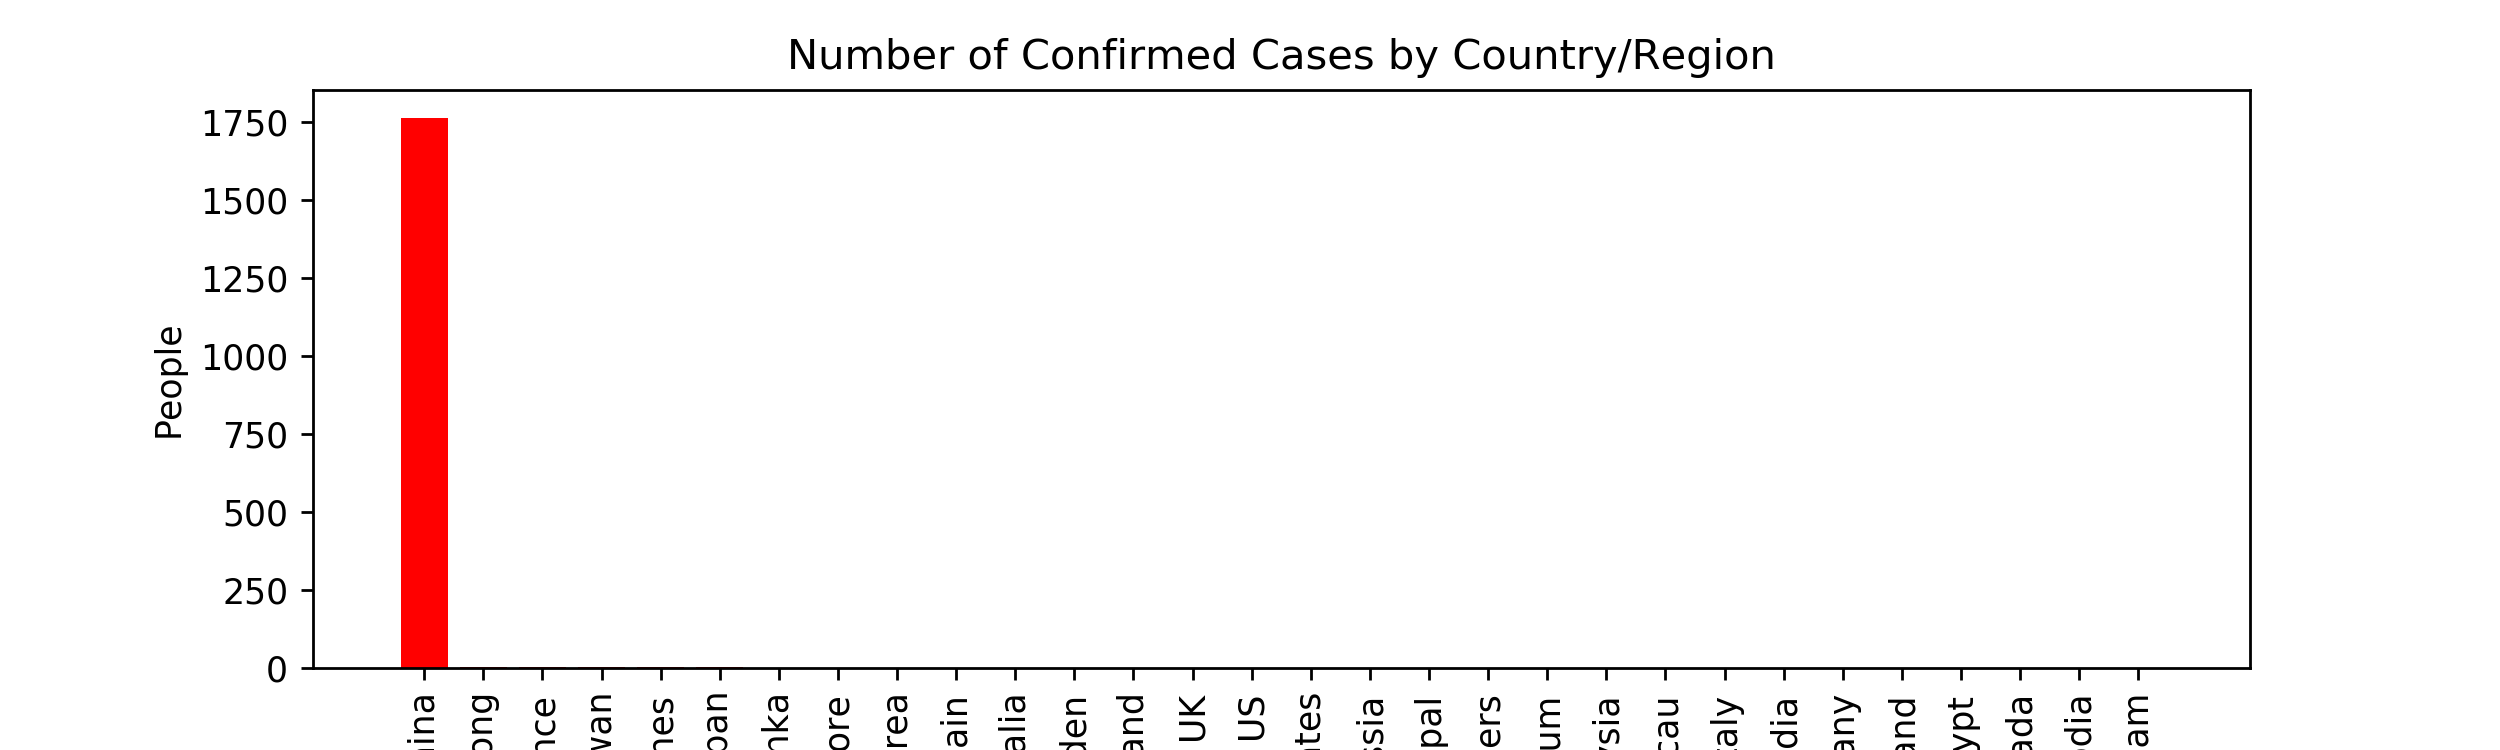

In [53]:
# Plot bar chart of Confirmed cases by country/region
fig, ax = plt.subplots()
ax.bar(x_axis, y_axis, color='r', alpha=1, align="center");   # Set bar chart axes, color, transparency & alignment
fig.set_size_inches(10,3);                                    # Set size of figure in inches, horizontal and vertical, respectively
ax.set_xticklabels(x_axis, rotation=90);                      # Set labels under horizontal x-axis, rotate words to be vertical
ax.set_xlabel("Country/Region");                              # Set horizontal x-label
ax.set_ylabel("People");                                      # Set vertical y-label
ax.set_title("Number of Confirmed Cases by Country/Region");  # Set title

fig_save(fig, "bar_confirmed_by_country.png")                 # Save fig

In [107]:
# Prepare simple bar chart of Deaths (ideally only showing countries where Deaths occurred)

# Set x axis to the list of countries, which is the index in the cleaned Deaths dataframe
x_axis = df_deaths_clean.index.values

# -- THIS NEXT ALTERNATE CODE WORKS FOR X-AXIS...BUT STILL NEED TO REDUCE Y-AXIS TO SAME OBJECT LENGTH (6 BASED ON CURRENT DATA).
# -- Set x axis to only list those countries where there were Deaths occurring (values greater than 0)
# -- x_axis = df_deaths_clean.index.values[(df_deaths_clean.loc[:, df_deaths_clean.columns[-1]].values > 0)]

# Print that list of countries (i.e., the dataframe index) 
x_axis

array(['Mainland China', 'Hong Kong', 'France', 'Taiwan', 'Philippines',
       'Japan', 'Sri Lanka', 'Singapore', 'South Korea', 'Spain',
       'Australia', 'Sweden', 'Thailand', 'UK', 'US',
       'United Arab Emirates', 'Russia', 'Nepal', 'Others', 'Belgium',
       'Malaysia', 'Macau', 'Italy', 'India', 'Germany', 'Finland',
       'Egypt', 'Canada', 'Cambodia', 'Vietnam'], dtype=object)

In [108]:
# See the date of the latest/most recent Deaths data (i.e., header from the last column farthest to the right)
df_deaths_clean.columns[-1]

'2/16/20'

In [109]:
# Set y axis to that latest/most recent Deaths data
y_axis = df_deaths_clean.loc[:, df_deaths_clean.columns[-1]]

# -- THIS NEXT ALTERNATE CODE IS IN PROGRESS--NEED TO REFINE.
# -- Set y axis to only list those countries where there were Deaths occurring (values greater than 0)
# -- y_axis = df_deaths_clean.loc[(df_deaths_clean.columns[-1].values > 0), df_deaths_clean.columns[-1]]

# Print that latest/most recent Deaths data
y_axis

Country/Region
Mainland China          1765
Hong Kong                  1
France                     1
Taiwan                     1
Philippines                1
Japan                      1
Sri Lanka                  0
Singapore                  0
South Korea                0
Spain                      0
Australia                  0
Sweden                     0
Thailand                   0
UK                         0
US                         0
United Arab Emirates       0
Russia                     0
Nepal                      0
Others                     0
Belgium                    0
Malaysia                   0
Macau                      0
Italy                      0
India                      0
Germany                    0
Finland                    0
Egypt                      0
Canada                     0
Cambodia                   0
Vietnam                    0
Name: 2/16/20, dtype: int32

<IPython.core.display.Javascript object>


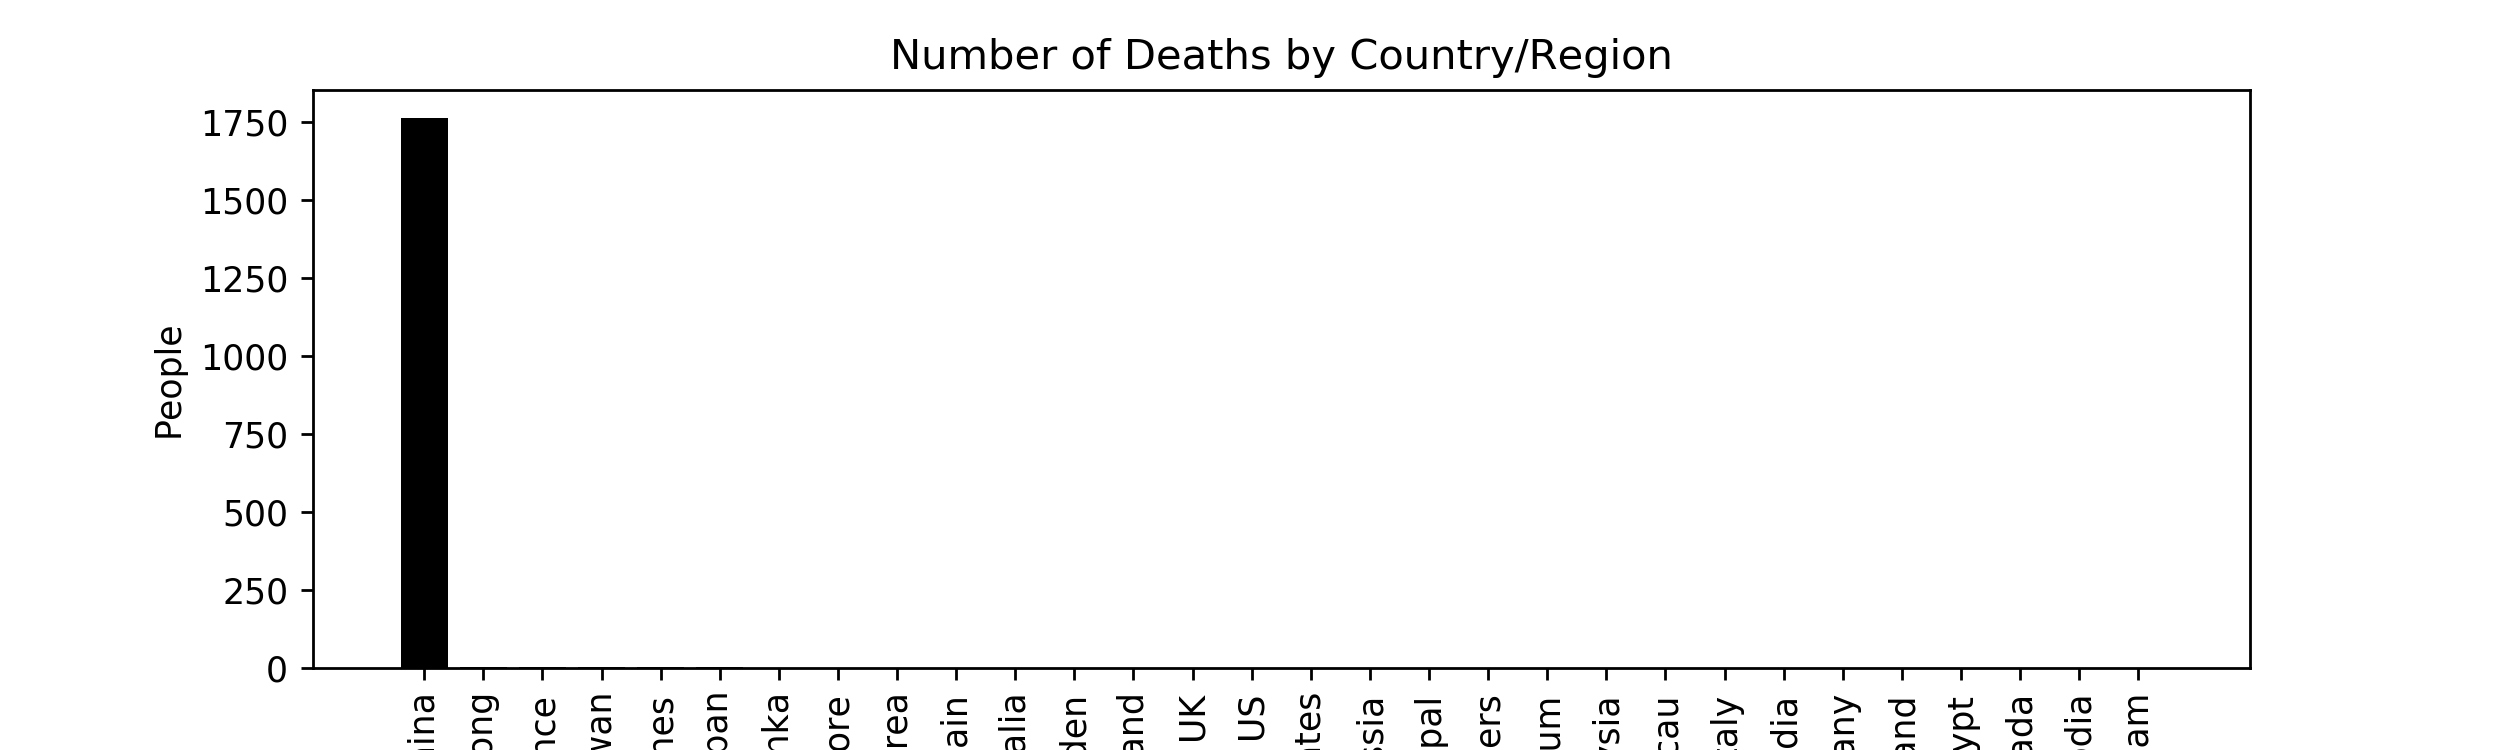

In [110]:
# Plot bar chart of Deaths cases by country/region
fig2, ax2 = plt.subplots()
ax2.bar(x_axis, y_axis, color='k', alpha=1, align="center");   # Set bar chart axes, color, transparency & alignment
fig2.set_size_inches(10,3);                                    # Set size of figure in inches, horizontal and vertical, respectively
ax2.set_xticklabels(x_axis, rotation=90);                      # Set labels under horizontal x-axis, rotate words to be vertical
ax2.set_xlabel("Country/Region");                              # Set horizontal x-label
ax2.set_ylabel("People");                                      # Set vertical y-label
ax2.set_title("Number of Deaths by Country/Region");  # Set title

fig_save(fig2, "bar_deaths_by_country.png")                 # Save fig